In [2]:
import os
import kagglehub
import os
from pathlib import Path
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import shutil
from collections import OrderedDict

C:\Users\User\anaconda3\envs\MLOPS\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# Загрузка датасета
path = kagglehub.dataset_download("darshanthakare/dog-breeds-image-dataset")
print("Path to dataset files:", path)

100%|██████████| 753M/753M [01:14<00:00, 10.6MB/s] 

Extracting files...


Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\darshanthakare\dog-breeds-image-dataset\versions\1


### Описание датасета:
#### Количество пород: 157
#### Количество изображений: 17000 +
#### Структура папок: корневая папка - папки с породами собак - изображение каждого вида
#### Остальные данные о датасете представлены ниже

## EDA-анализ датасета

#### 1. Базовая статистика

Результат ячейки ниже выполнен уже после удаления папок, которые после детекции с помощью модели yolo стали содержать меньше 100 изображений

При этом графики являются оторажением изначального датасета

In [8]:
dataset_path = r"C:/Users/User/.cache/kagglehub/datasets/darshanthakare/dog-breeds-image-dataset/versions/1/cropped_dogs"

image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}
total_images = 0  # Общее количество изображений
total_breeds = 0  # Общее количество пород
images_per_breed = defaultdict(int)  # Количество изображений по каждой породе

# Получаем список папок с породами (первого уровня)
breed_folders = [f for f in os.listdir(dataset_path) 
                if os.path.isdir(os.path.join(dataset_path, f))]
total_breeds = len(breed_folders)

# Подсчёт изображений
for breed_folder in breed_folders:
    breed_path = os.path.join(dataset_path, breed_folder)
    for file in os.listdir(breed_path):
        if Path(file).suffix.lower() in image_extensions:
            total_images += 1
            images_per_breed[breed_folder] += 1

# Вывод результатов
print(f"Всего пород: {total_breeds}")
print(f"Всего изображений: {total_images}")
print("\nКоличество изображений по породам:")
for breed, count in images_per_breed.items():
    print(f"- {breed}: {count} изображений")

Всего пород: 75
Всего изображений: 10117

Количество изображений по породам:
- airedale: 123 изображений
- american_terrier: 138 изображений
- appenzeller: 127 изображений
- australian_terrier: 145 изображений
- basenji: 148 изображений
- basset_hound: 155 изображений
- beagle: 173 изображений
- bernese_mountain: 177 изображений
- blenheim_spaniel: 126 изображений
- blood_hound: 120 изображений
- bluetick: 119 изображений
- border_collie: 146 изображений
- border_terrier: 112 изображений
- boston_bulldog: 149 изображений
- boxer: 133 изображений
- brittany_spaniel: 114 изображений
- bull_mastiff: 132 изображений
- cairn_terrier: 146 изображений
- cardigan_corgi: 124 изображений
- chesapeake_retriever: 131 изображений
- chihuahua: 114 изображений
- chow: 105 изображений
- cocker_spaniel: 169 изображений
- dandie_terrier: 112 изображений
- english_setter: 132 изображений
- english_sheepdog: 109 изображений
- english_springer: 152 изображений
- entlebucher: 179 изображений
- french_bulldo

#### 2. Анализ распределения классов

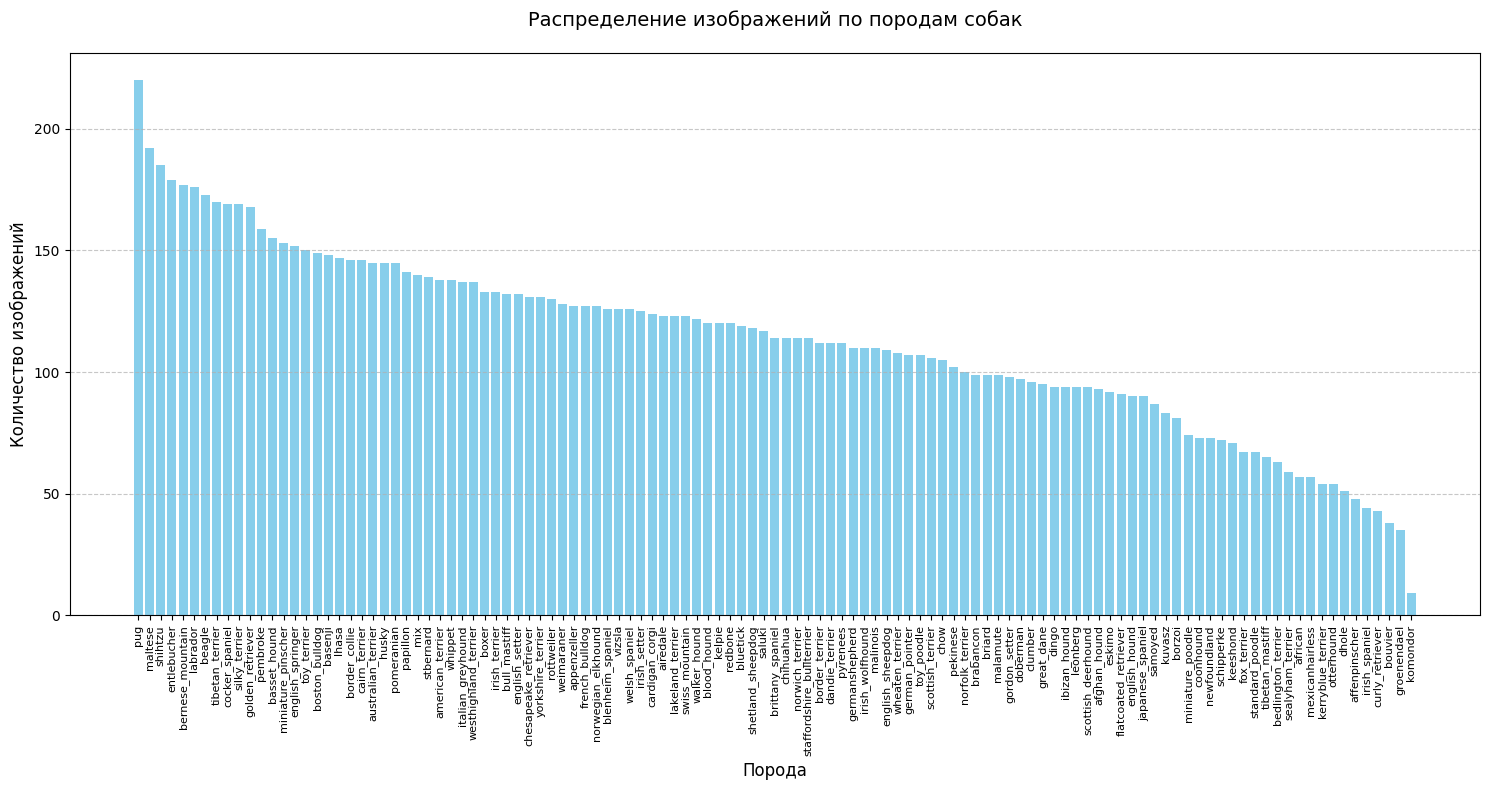

In [4]:
# Сортируем словарь images_per_breed по количеству изображений
sorted_breeds = OrderedDict(sorted(images_per_breed.items(), 
                               key=lambda x: x[1], 
                               reverse=True))

breeds = list(sorted_breeds.keys())
counts = list(sorted_breeds.values())

plt.figure(figsize=(15, 8))
bars = plt.bar(breeds, counts, color='skyblue')
plt.title(f'Распределение изображений по породам собак', 
          fontsize=14, pad=20)
plt.xlabel('Порода', fontsize=12)
plt.ylabel('Количество изображений', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Проанализировав график, я решила удалить из датасета папки, в которых меньше 100 изображений

#### 3. Обработка датасета

Результат ячейки был случайно обновлен, поэтому сейчас не содержит список директорий, которые были удалены в дальнейшем

In [6]:
# Количество пород, которые стоит удалить
low_count_folders = {folder: count for folder, count in images_per_breed.items() if count < 100}

def count_images(folder):
    """Считает количество изображений в папке"""
    extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}
    return len([f for f in os.listdir(folder) if Path(f).suffix.lower() in extensions])

def delete_folders_with_few_images(root_path, min_images=90):
    """Удаляет конечные папки с количеством изображений меньше min_images"""
    deleted = []
    errors = []
    
    # Проходим по всем конечным папкам
    for folder in os.listdir(root_path):
        folder_path = os.path.join(root_path, folder)
        if os.path.isdir(folder_path):
            try:
                img_count = count_images(folder_path)
                if img_count < min_images:
                    shutil.rmtree(folder_path)
                    deleted.append((folder, img_count))
                    print(f"Удалено: {folder} ({img_count} изображений)")
            except Exception as e:
                errors.append(f"Ошибка в {folder}: {str(e)}")
    
    # Вывод результатов
    print(f"\nИтого: удалено {len(deleted)} папок")

delete_folders_with_few_images(dataset_path)


Итого: удалено 0 папок


Проверка удалены ли папки

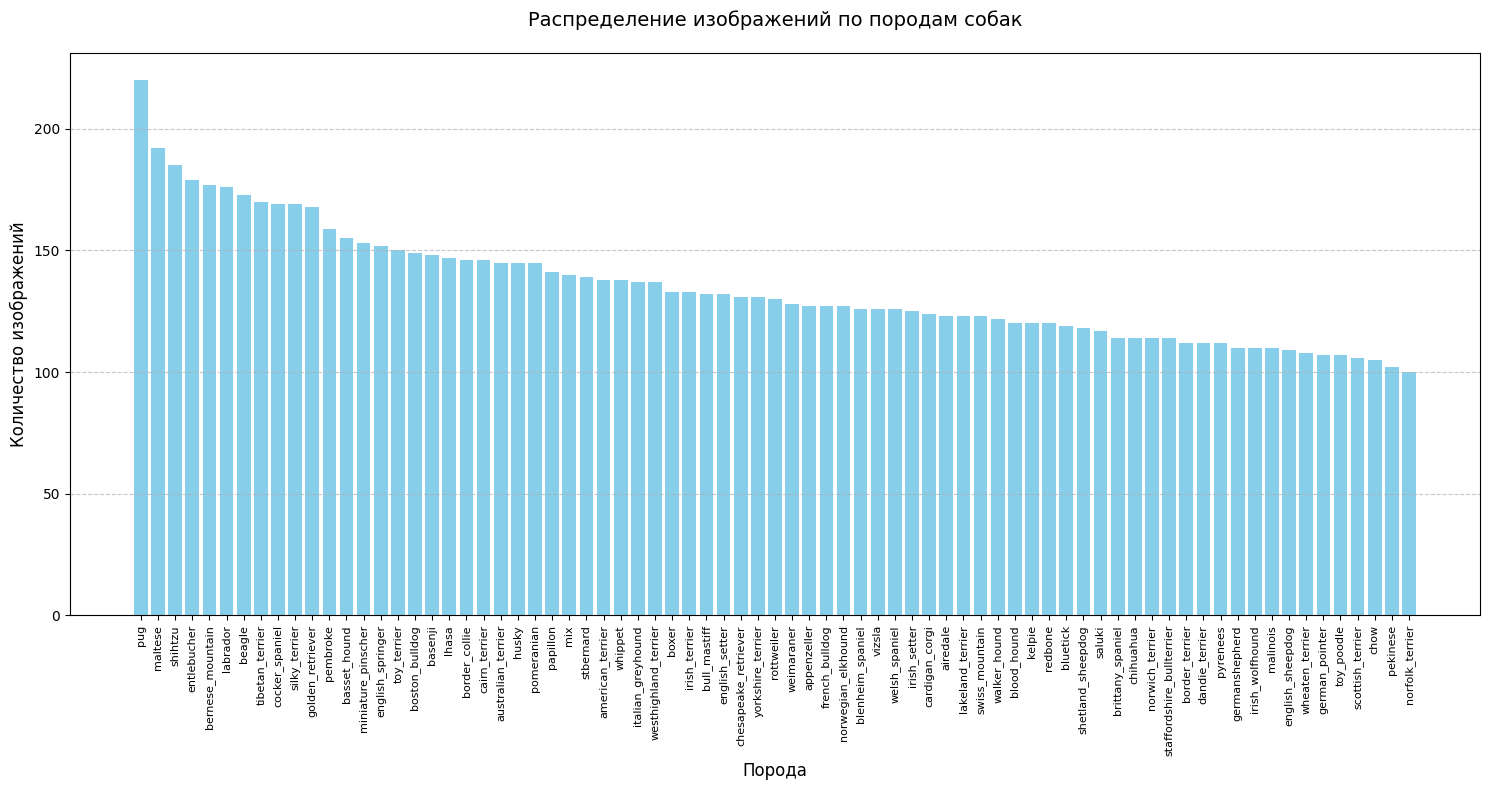

In [7]:
remaining_breeds = [f for f in os.listdir(dataset_path) 
                   if os.path.isdir(os.path.join(dataset_path, f))]

# Подсчет изображений для оставшихся пород
images_per_remaining_breed = defaultdict(int)
for breed in remaining_breeds:
    breed_path = os.path.join(dataset_path, breed)
    images = [f for f in os.listdir(breed_path) 
             if Path(f).suffix.lower() in image_extensions]
    images_per_remaining_breed[breed] = len(images)

# 4. Подготовка данных для графика
sorted_breeds = sorted(images_per_remaining_breed.items(), 
                      key=lambda x: x[1], 
                      reverse=True)
breeds = [x[0] for x in sorted_breeds]
counts = [x[1] for x in sorted_breeds]


plt.figure(figsize=(15, 8))
bars = plt.bar(breeds, counts, color='skyblue')
plt.title(f'Распределение изображений по породам собак', 
          fontsize=14, pad=20)
plt.xlabel('Порода', fontsize=12)
plt.ylabel('Количество изображений', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

#### Итоговый датасет (после детекции)

Проверка структуры данных:
Найдено классов: 75

Анализ распределения изображений:


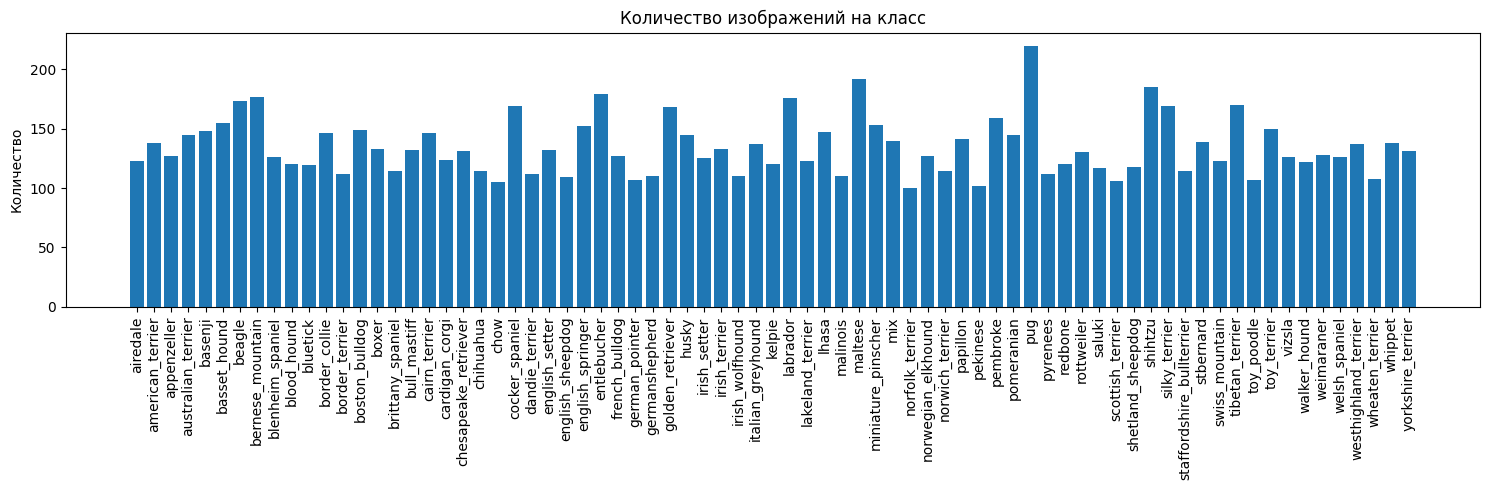

Всего изображений: 10117
Медианное количество на класс: 130.0
Минимальное количество: 100
Максимальное количество: 220

Проверка соответствия меток:
Всего меток: 10117
Уникальных классов: 75


In [10]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter

def inspect_dataset(data_path):
    # Проверка структуры папок
    print("="*50)
    print("Проверка структуры данных:")
    classes = sorted(os.listdir(data_path))
    print(f"Найдено классов: {len(classes)}")
    
    # Анализ количества изображений
    print("\n" + "="*50)
    print("Анализ распределения изображений:")
    class_counts = {}
    for class_name in classes:
        class_dir = os.path.join(data_path, class_name)
        if os.path.isdir(class_dir):
            num_images = len(os.listdir(class_dir))
            class_counts[class_name] = num_images
    
    # Визуализация распределения
    plt.figure(figsize=(15, 5))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xticks(rotation=90)
    plt.title("Количество изображений на класс")
    plt.ylabel("Количество")
    plt.tight_layout()
    plt.show()
    
    # Статистика
    print(f"Всего изображений: {sum(class_counts.values())}")
    print(f"Медианное количество на класс: {np.median(list(class_counts.values()))}")
    print(f"Минимальное количество: {min(class_counts.values())}")
    print(f"Максимальное количество: {max(class_counts.values())}")
    
    
    # Проверка меток
    print("\n" + "="*50)
    print("Проверка соответствия меток:")
    all_labels = []
    for class_idx, class_name in enumerate(classes):
        class_dir = os.path.join(data_path, class_name)
        num_images = len(os.listdir(class_dir))
        all_labels.extend([class_idx] * num_images)
    
    label_counts = Counter(all_labels)
    print(f"Всего меток: {len(all_labels)}")
    print(f"Уникальных классов: {len(label_counts)}")


data_path = "C:/Users/User/.cache/kagglehub/datasets/darshanthakare/dog-breeds-image-dataset/versions/1/cropped_dogs"
inspect_dataset(data_path)